# Clue Expected Values

The purpose of this notebook is to calculate the expected value of a clue given the round and what row it is in. We do this by finding the earnings of each question, and then grouping by row and round and taking the mean. The earnings of every question is the number of people who got it right minus the number of people who got it wrong. 

### Data Preparation

In [1]:
#Import packages and read datasets
import warnings
warnings.simplefilter(action='ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\mhous\\scrap\\JeopardyProject')
clues = pd.read_csv('clues.csv')

In [2]:
#Select just the relevant columns from clues
df = clues[['value','order_number', 'round', 'row', 'n_correct', 'n_incorrect']]
#Since the daily double value is based on the wager and not where it was found, we create a 'base_value' column
conditions = [
    (df['round'] == 'J') & (df['row'] == 1.0),
    (df['round'] == 'J') & (df['row'] == 2.0),
    (df['round'] == 'J') & (df['row'] == 3.0),
    (df['round'] == 'J') & (df['row'] == 4.0),
    (df['round'] == 'J') & (df['row'] == 5.0),
    (df['round'] == 'DJ') & (df['row'] == 1.0),
    (df['round'] == 'DJ') & (df['row'] == 2.0),
    (df['round'] == 'DJ') & (df['row'] == 3.0),
    (df['round'] == 'DJ') & (df['row'] == 4.0),
    (df['round'] == 'DJ') & (df['row'] == 5.0),
    (df['round'] == 'FJ')
    ]

values = [200, 400, 600, 800, 1000, 400, 800, 1200, 1600, 2000, np.NaN]

df['base_value'] = np.select(conditions, values)

### Expected Value of non-Daily Double Clues

In [3]:
#Filter data to select only non-daily doubles
non_daily_doubles = df[df['value'].str[0] != "D"]
#Calculate the earnings of each question. base_value * n_correct - base_value * n_incorrect
non_daily_doubles['earnings'] = non_daily_doubles['base_value'] * non_daily_doubles['n_correct'] - non_daily_doubles['base_value'] * non_daily_doubles['n_incorrect']
#Group by round and row and take the mean. Drop show_number column 
round_row_earnings = non_daily_doubles.groupby(['round', 'row']).mean().sort_index(ascending=[False, True]).round(2)
round_row_earnings

n_correct  n_incorrect  base_value  earnings
round row                                              
J     1.0       0.96         0.08       200.0    175.73
      2.0       0.92         0.11       400.0    325.47
      3.0       0.89         0.12       600.0    461.12
      4.0       0.85         0.14       800.0    572.70
      5.0       0.76         0.16      1000.0    598.39
DJ    1.0       0.94         0.09       400.0    338.54
      2.0       0.89         0.12       800.0    613.43
      3.0       0.84         0.14      1200.0    834.86
      4.0       0.77         0.15      1600.0    982.79
      5.0       0.66         0.17      2000.0    965.30

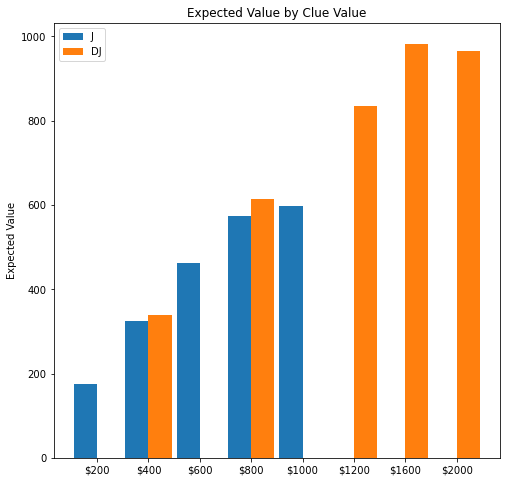

In [4]:
#Reset index to allow for easier filtering
round_row_earnings = round_row_earnings.reset_index()
#Filter earnings by round and convert values to a list
J_earnings = round_row_earnings[round_row_earnings['round'] == 'J']['earnings'].values.tolist()
DJ_earnings = round_row_earnings[round_row_earnings['round'] == 'DJ']['earnings'].values.tolist()
#In order to plot the data, we need the data to have the same x axis. This means we need to append 0 to J_earnings three times 
#for the $1200, $1600 and $2000 clues, and similarly insert 0 in DJ_earnings in the $200, $600, and $1000 clues
J_earnings.append(0)
J_earnings.append(0)
J_earnings.append(0)
DJ_earnings.insert(0, 0)
DJ_earnings.insert(2, 0)
DJ_earnings.insert(4, 0)

#Create labels for xticks
labels = ['$200', '$400', '$600', '$800', '$1000', '$1200', '$1600', '$2000']
x = np.arange(len(labels))  
width = 0.45  

fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x - width/2, J_earnings, width, label='J')
rects2 = ax.bar(x + width/2, DJ_earnings, width, label='DJ')

# Add text for labels, title and custom x-axis tick labels
ax.set_ylabel('Expected Value')
ax.set_title('Expected Value by Clue Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [5]:
daily_doubles = df[df['value'].str[0] == "D"]
daily_doubles['wager'] = df[df['value'].str[0] == "D"]['value'].str[5:].replace('[,]', '', regex=True).astype(float)
daily_doubles['earnings'] = daily_doubles['wager'] * daily_doubles['n_correct'] - daily_doubles['wager'] * daily_doubles['n_incorrect']
round_row_dd_earnings = daily_doubles.groupby(['round', 'row']).mean().sort_index(ascending=[False, True]).round(2)
round_row_dd_earnings

n_correct  n_incorrect  base_value    wager  earnings
round row                                                       
J     1.0       0.50         0.50       200.0  1300.00    700.00
      2.0       0.71         0.29       400.0  1441.40    652.04
      3.0       0.73         0.27       600.0  1486.40    746.66
      4.0       0.67         0.33       800.0  1522.76    608.61
      5.0       0.61         0.39      1000.0  1588.02    379.25
DJ    1.0       0.67         0.33       400.0  2155.56    800.00
      2.0       0.72         0.28       800.0  2936.81   1520.08
      3.0       0.66         0.34      1200.0  2760.54   1009.52
      4.0       0.63         0.37      1600.0  2912.39    929.38
      5.0       0.57         0.43      2000.0  2929.48    667.25

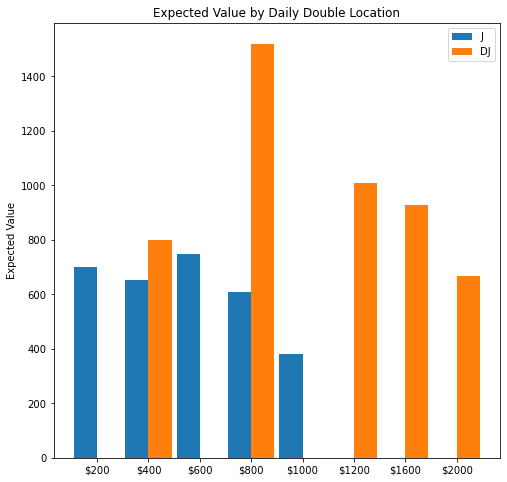

In [6]:
round_row_dd_earnings = round_row_dd_earnings.reset_index()
dd_J_earnings = round_row_dd_earnings[round_row_dd_earnings['round'] == 'J']['earnings'].values.tolist()
dd_DJ_earnings = round_row_dd_earnings[round_row_dd_earnings['round'] == 'DJ']['earnings'].values.tolist()
dd_J_earnings.append(0)
dd_J_earnings.append(0)
dd_J_earnings.append(0)
dd_DJ_earnings.insert(0, 0)
dd_DJ_earnings.insert(2, 0)
dd_DJ_earnings.insert(4, 0)


labels = ['$200', '$400', '$600', '$800', '$1000', '$1200', '$1600', '$2000']
x = np.arange(len(labels))  
width = 0.45  

fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x - width/2, dd_J_earnings, width, label='J')
rects2 = ax.bar(x + width/2, dd_DJ_earnings, width, label='DJ')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Expected Value')
ax.set_title('Expected Value by Daily Double Location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()